# Expander Data Discharge Pressure Prediction

## Data Visaulisation

In [0]:
dataset_url = "https://github.com/rani700/datasets/blob/master/Expander_data.csv.txt?raw=true"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df = pd.read_csv(dataset_url)

In [276]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


### Run Status Coulumn contains all NaN values so we drop this column

In [277]:
df.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


In [0]:
df = df.iloc[:, :-1]

In [279]:
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


In [280]:
df.iloc[:, 6].values

array([226.0449315, 217.1509736, 226.0540858, ..., 231.3367608,
       220.6756921, 207.9314276])

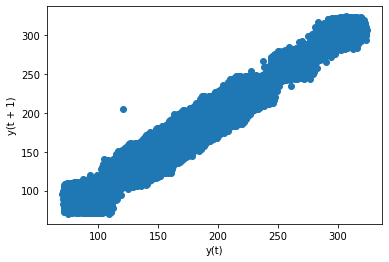

In [281]:
pd.plotting.lag_plot(df.iloc[:, 6])
plt.show()

### Plotting all the columns

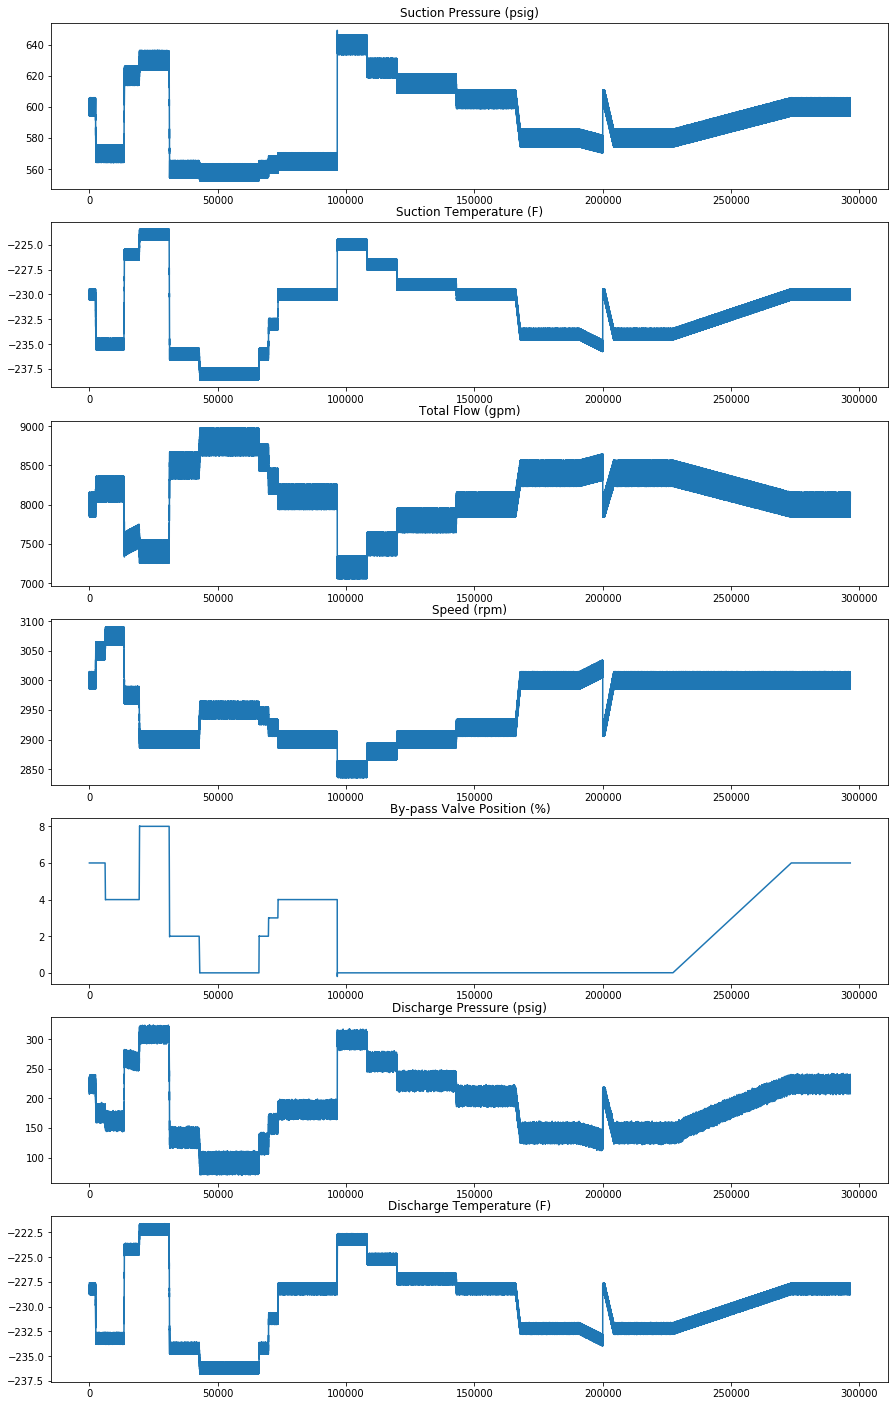

In [282]:
fig, axs = plt.subplots(7, figsize=(15, 25))
axs[0].plot(df.iloc[:, 1])
axs[1].plot(df.iloc[:, 2])
axs[2].plot(df.iloc[:, 3])
axs[3].plot(df.iloc[:, 4])
axs[4].plot(df.iloc[:, 5])
axs[5].plot(df.iloc[:, 6])
axs[6].plot(df.iloc[:, 7])

axs[0].set_title(df.columns[1])
axs[1].set_title(df.columns[2])
axs[2].set_title(df.columns[3])
axs[3].set_title(df.columns[4])
axs[4].set_title(df.columns[5])
axs[5].set_title(df.columns[6])
axs[6].set_title(df.columns[7])

plt.show()

### Finding Corelation of column Discharge Pressure (psig) with all other colummns

In [283]:
df.corr().style.background_gradient(cmap='coolwarm')

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
Suction Pressure (psig),1,0.862881,-0.873558,-0.371829,0.0894199,0.905435,0.862876
Suction Temperature (F),0.862881,1,-0.938631,-0.500437,0.349575,0.960071,0.999993
Total Flow (gpm),-0.873558,-0.938631,1,0.48432,-0.274621,-0.973483,-0.938624
Speed (rpm),-0.371829,-0.500437,0.48432,1,0.175187,-0.434955,-0.500435
By-pass Valve Position (%),0.0894199,0.349575,-0.274621,0.175187,1,0.400566,0.349572
Discharge Pressure (psig),0.905435,0.960071,-0.973483,-0.434955,0.400566,1,0.960065
Discharge Temperature (F),0.862876,0.999993,-0.938624,-0.500435,0.349572,0.960065,1


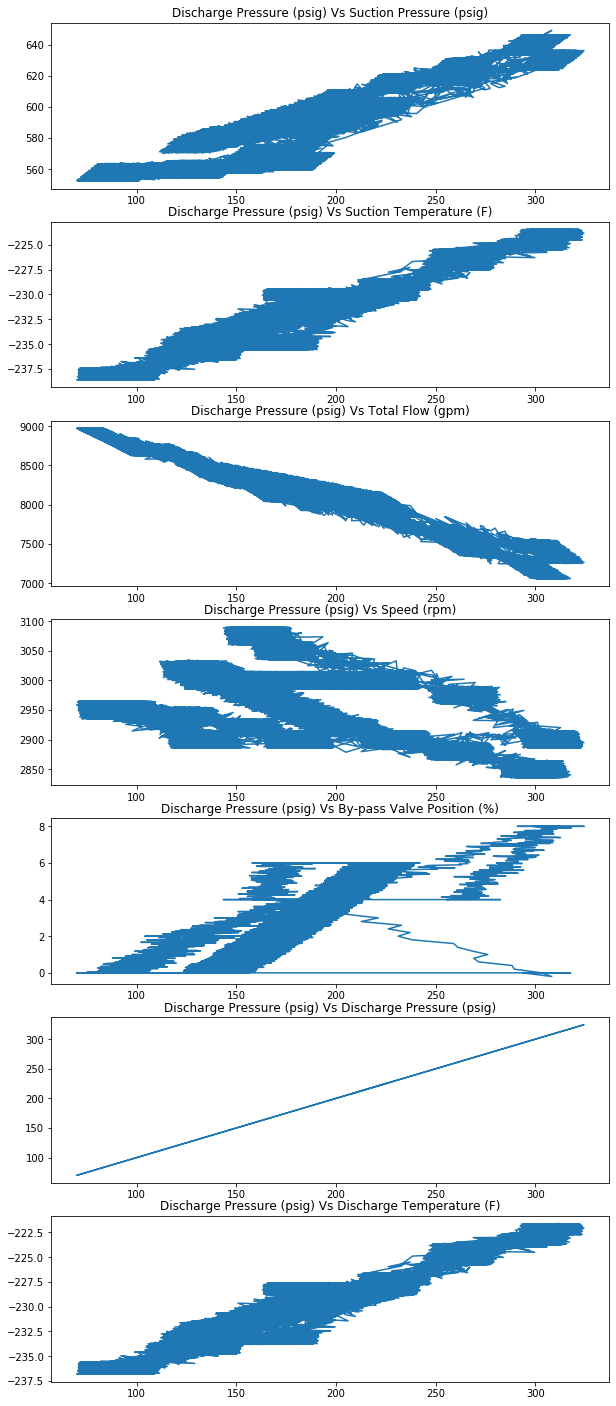

In [284]:
fig, axs = plt.subplots(7, figsize=(10, 25))
axs[0].plot(df.iloc[:, 6], df.iloc[:, 1])
axs[1].plot(df.iloc[:, 6], df.iloc[:, 2])
axs[2].plot(df.iloc[:, 6], df.iloc[:, 3])
axs[3].plot(df.iloc[:, 6], df.iloc[:, 4])
axs[4].plot(df.iloc[:, 6], df.iloc[:, 5])
axs[5].plot(df.iloc[:, 6], df.iloc[:, 6])
axs[6].plot(df.iloc[:, 6], df.iloc[:, 7])

axs[0].set_title(df.columns[6]+" Vs "+df.columns[1])
axs[1].set_title(df.columns[6]+" Vs "+df.columns[2])
axs[2].set_title(df.columns[6]+" Vs "+df.columns[3])
axs[3].set_title(df.columns[6]+" Vs "+df.columns[4])
axs[4].set_title(df.columns[6]+" Vs "+df.columns[5])
axs[5].set_title(df.columns[6]+" Vs "+df.columns[6])
axs[6].set_title(df.columns[6]+" Vs "+df.columns[7])

plt.show()

## Data Preprocessing

Since columns  
Suction Pressure (psig)   (1) (+ve)  
Suction Temperature (F)   (2) (+ve)  
Total Flow (gpm)          (3) (-ve)  
Discharge Temperature (F) (7) (+ve)  
    
Shows high corelation with  
Discharge Pressure (psig) (6)  
  
So we can use these columns to predict   
Column Discharge Pressure (psig) (6)  

Making Timestamp column index and averaging dataset per minute

In [0]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace= True)
df = df.resample('T').mean()

In [286]:
df.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
Timestamp,,,,,,,
2020-01-04 21:20:00,598.244059,-229.936296,7976.425603,3001.484207,6.0,223.816543,-228.131880
2020-01-04 21:21:00,597.581277,-229.762116,8029.633484,3005.553809,6.0,218.492560,-227.969545
2020-01-04 21:22:00,598.838995,-229.749274,8043.321448,2997.088859,6.0,220.239653,-227.966259
2020-01-04 21:23:00,596.566813,-230.021820,8041.963713,3006.632945,6.0,216.490751,-228.226056
2020-01-04 21:24:00,600.832241,-230.159568,7986.974519,2995.144693,6.0,226.447792,-228.363942


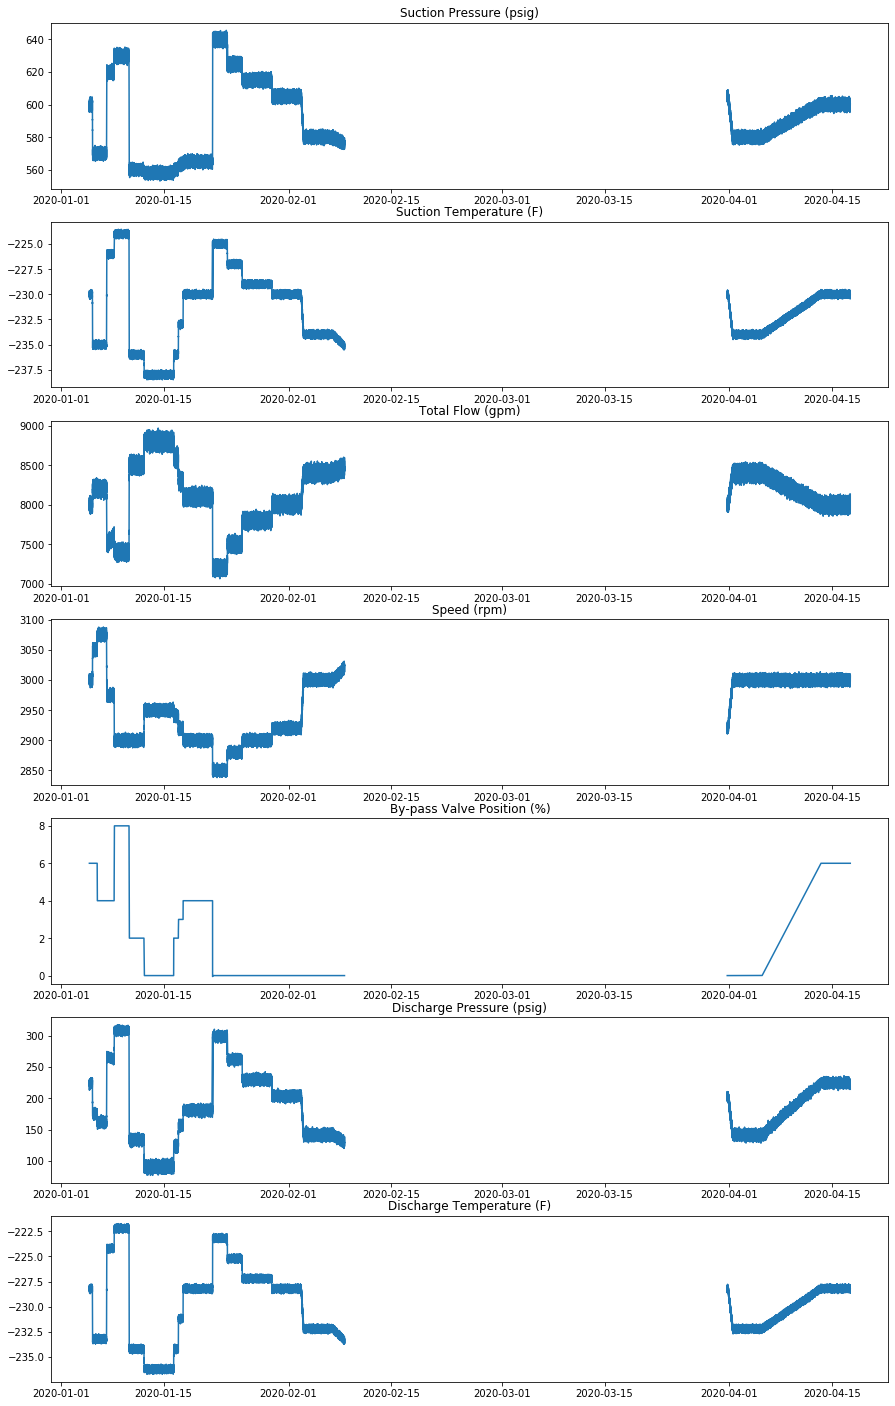

In [287]:
fig, axs = plt.subplots(7, figsize=(15, 25))
axs[0].plot(df.iloc[:, 0])
axs[1].plot(df.iloc[:, 1])
axs[2].plot(df.iloc[:, 2])
axs[3].plot(df.iloc[:, 3])
axs[4].plot(df.iloc[:, 4])
axs[5].plot(df.iloc[:, 5])
axs[6].plot(df.iloc[:, 6])

axs[0].set_title(df.columns[0])
axs[1].set_title(df.columns[1])
axs[2].set_title(df.columns[2])
axs[3].set_title(df.columns[3])
axs[4].set_title(df.columns[4])
axs[5].set_title(df.columns[5])
axs[6].set_title(df.columns[6])

plt.show()

In [0]:
# X = df.iloc[:, [0, 1, 2, 6]].values
# y = df.iloc[:, [5]].values

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

By the above plot we can see that there is anamoly in data between 2020-02-08 14:00:00 , 2020-03-31 17:00:00 
So we will take the data from start to 2020-02-08 14:00:00 as train set and 2020-03-31 17:00:00 to end as testing set.

In [0]:
X_train = df[:'2020-02-08 14:00:00'].iloc[:, [0, 1, 2, 6]].values
y_train = df[:'2020-02-08 14:00:00'].iloc[:, [5]].values

y_test = df['2020-03-31 17:00:00':].iloc[:, [5]].values
X_test = df['2020-03-31 17:00:00':].iloc[:, [0, 1, 2, 6]].values

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

We have to scale the data to fed into training 

In [0]:
scaler_X_train = StandardScaler()
scaler_X_train.fit(X_train)
X_train = scaler_X_train.transform(X_train)

scaler_X_test = StandardScaler()
scaler_X_test.fit(X_test)
X_test = scaler_X_test.transform(X_test)

scaler_y_train = StandardScaler()
scaler_y_train.fit(y_train)
y_train = scaler_y_train.transform(y_train)

scaler_y_test = StandardScaler()
scaler_y_test.fit(y_test)
y_test = scaler_y_test.transform(y_test)

## Regression using Linear Machine Learning Models

### Linear Regression

In [293]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [294]:
# Training Score
lin_reg.score(X_train, y_train)

0.9870851387974121

In [295]:
# Testing Score
lin_reg.score(X_test, y_test)

0.9826267702157442

In [296]:
# Training RMSE Value
y_hat_train = lin_reg.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared = False))

0.11364357088101314


In [297]:
# Testing RMSE Value
y_hat_test = lin_reg.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared = False))

0.1318075482825463


#### Actual vs Predicted plot on Training set

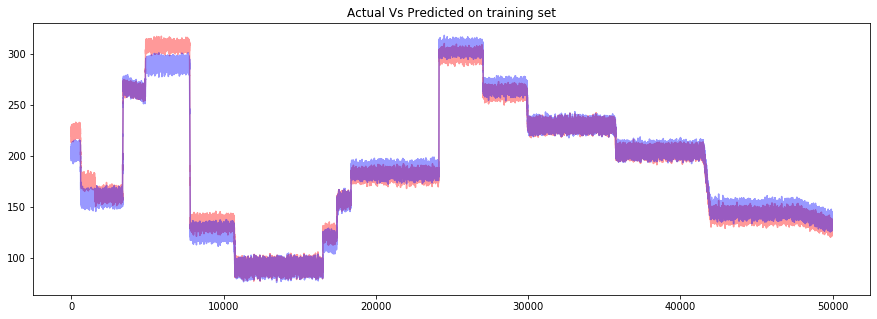

In [298]:
plt.figure(figsize=(15, 5))
plt.plot(scaler_y_train.inverse_transform( y_train ), 'r-', alpha=0.4)
plt.plot(scaler_y_train.inverse_transform( y_hat_train ), 'b-', alpha=0.4)
plt.title("Actual Vs Predicted on training set")
plt.show()

#### Actual vs Predicted plot on Testing set

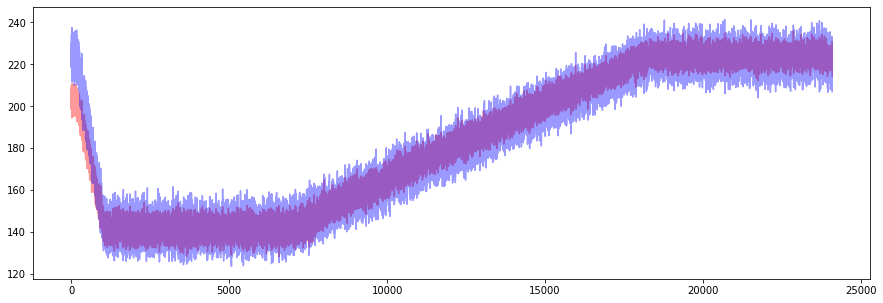

In [299]:
plt.figure(figsize=(15, 5))
plt.plot(scaler_y_test.inverse_transform( y_test ), 'r-', alpha=0.4)
plt.plot(scaler_y_test.inverse_transform( y_hat_test ), 'b-', alpha=0.4)
plt.show()

### Lasso Regression

In [300]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [301]:
# Training Score
lasso_reg.score(X_train, y_train)

0.9764011077890258

In [302]:
# Testing Score
lasso_reg.score(X_test, y_test)

0.9698949081902964

In [303]:
# Training RMSE Value
y_hat_train = lin_reg.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared = False))

0.11364357088101314


In [304]:
# Testing RMSE Value
y_hat_test = lin_reg.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared = False))

0.1318075482825463


#### Actual vs Predicted plot on Training set

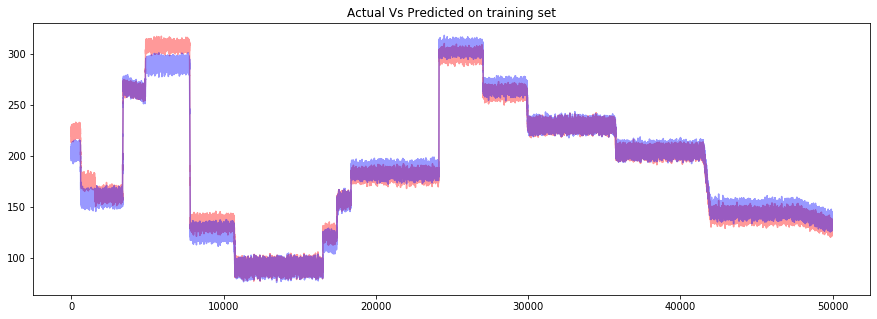

In [305]:
plt.figure(figsize=(15, 5))
plt.plot(scaler_y_train.inverse_transform( y_train ), 'r-', alpha=0.4)
plt.plot(scaler_y_train.inverse_transform( y_hat_train ), 'b-', alpha=0.4)
plt.title("Actual Vs Predicted on training set")
plt.show()

#### Actual vs Predicted plot on Testing set

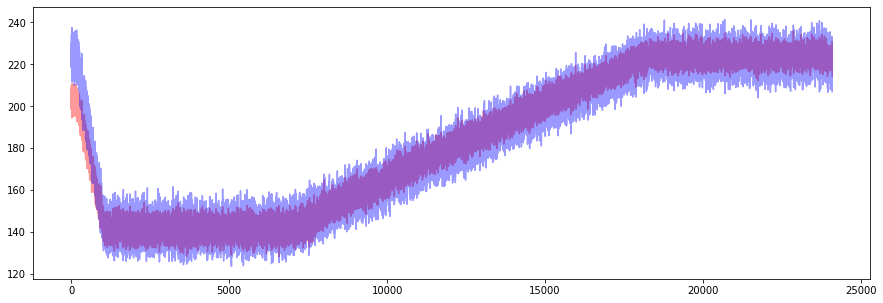

In [306]:
plt.figure(figsize=(15, 5))
plt.plot(scaler_y_test.inverse_transform( y_test ), 'r-', alpha=0.4)
plt.plot(scaler_y_test.inverse_transform( y_hat_test ), 'b-', alpha=0.4)
plt.show()

## Regression Using Deep Learning models

### Deep Neural Network Regression

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [308]:
model = Sequential()
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='sgd', )
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               640       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 32)              

In [309]:
model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))


Train on 49961 samples, validate on 24093 samples
Epoch 1/5
49961/49961 [==============================] - 10s 200us/step - loss: 0.4278 - val_loss: 0.0252
Epoch 2/5
49961/49961 [==============================] - 8s 159us/step - loss: 0.0737 - val_loss: 0.0186
Epoch 3/5
49961/49961 [==============================] - 8s 150us/step - loss: 0.0563 - val_loss: 0.0236
Epoch 4/5
49961/49961 [==============================] - 7s 143us/step - loss: 0.0497 - val_loss: 0.0231
Epoch 5/5
49961/49961 [==============================] - 7s 145us/step - loss: 0.0462 - val_loss: 0.0239


In [310]:
# MSE of training data
y_hat_train = model.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared=True))

0.0072480629884830745


In [311]:
# MSE of testing data
y_hat_test = model.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared=True))

0.02387955190263857


In [312]:
# RMSE of training data
y_hat_train = model.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared=False))

0.08513555654650455


In [313]:
# RMSE of testing data
y_hat_test = model.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared=False))

0.1545301003126529


In [0]:
model.save("weights_nn.h5")

### CNN Regression

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [0]:
X_train = X_train.reshape(X_train.shape[0], 4,1)
X_test = X_test.reshape(X_test.shape[0], 4,1)


In [0]:
model = Sequential()
model.add(Conv1D(filters=6, kernel_size=2, activation='relu', input_shape=(4,1)))
model.add(Conv1D(filters=6, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [318]:
model.fit(X_train, y_train, epochs=15, verbose=1, validation_data=(X_test, y_test))


Train on 49961 samples, validate on 24093 samples
Epoch 1/15
49961/49961 [==============================] - 11s 221us/step - loss: 0.0146 - val_loss: 0.0287
Epoch 2/15
49961/49961 [==============================] - 8s 166us/step - loss: 0.0028 - val_loss: 0.0301
Epoch 3/15
49961/49961 [==============================] - 8s 169us/step - loss: 0.0022 - val_loss: 0.0316
Epoch 4/15
49961/49961 [==============================] - 8s 169us/step - loss: 0.0021 - val_loss: 0.0291
Epoch 5/15
49961/49961 [==============================] - 9s 174us/step - loss: 0.0019 - val_loss: 0.0299
Epoch 6/15
49961/49961 [==============================] - 8s 163us/step - loss: 0.0019 - val_loss: 0.0291
Epoch 7/15
49961/49961 [==============================] - 9s 170us/step - loss: 0.0018 - val_loss: 0.0296
Epoch 8/15
49961/49961 [==============================] - 9s 171us/step - loss: 0.0018 - val_loss: 0.0274
Epoch 9/15
49961/49961 [==============================] - 8s 165us/step - loss: 0.0018 - val_loss: 0.

In [319]:
# MSE of training data
y_hat_train = model.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared=True))

0.0016885612910253853


In [320]:
# MSE of testing data
y_hat_test = model.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared=True))

0.025371989337233496


In [321]:
# RMSE of training data
y_hat_train = model.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared=False))

0.04109210740550289


In [322]:
# RMSE of testing data
y_hat_test = model.predict(X_test)
print(mean_squared_error(y_test, y_hat_test, squared=False))

0.15928587299956481


In [0]:
model.save("weights_cnn.h5")